In [2]:
!pip install outlier_utils
!pip install cmh
!pip install neulab

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.nonparametric.kde import KDEUnivariate
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from scipy.stats import gaussian_kde, norm, mode, ttest_ind
from scipy.stats import kstest, shapiro, anderson, cramervonmises
from statsmodels.stats.diagnostic import lilliefors
from statsmodels.stats.contingency_tables import mcnemar
from cmh import CMH
from outliers import smirnov_grubbs as grubbs
from neulab.OutlierDetection import DixonTest
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from patsy import dmatrices
from scipy import stats as sps

**В качестве датасета мною был выбран датасет статистики 20000+ игроков в Left 4 Dead 2**

In [5]:
data = pd.read_csv('l4d2_player_stats_final.csv')
data.head()



,Username,Playtime_(Hours),Pistol_Shots,Pistol_Kills,Pistol_Usage,Magnum_Shots,Magnum_Kills,Magnum_Usage,Uzi_Shots,Uzi_Kills,...,Knife_Usage,Molotovs_Thrown,Molotov_Kills,Pipe_Bombs_Thrown,Pipe_Bomb_Kills,Bile_Jars_Thrown,Bile_Jar_Hits,Most_Friendly_Fire,Difficulty,Average_Friendly_Fire
0,0,2433.577222,94665.0,10470.0,2.77,121222.0,27056.0,7.16,44666.0,5165.0,...,0.47,11166.0,99278.0,5817.0,23433.0,5802.0,12863.0,13653.0,Normal,142.0
1,1,121.879444,9136.0,1371.0,1.47,14928.0,6802.0,7.30,997.0,187.0,...,0.03,788.0,10141.0,977.0,6962.0,519.0,1557.0,1914.0,Expert,89.0
2,2,69.955278,4100.0,693.0,4.87,222.0,133.0,0.93,2834.0,271.0,...,0.00,23.0,130.0,445.0,1202.0,44.0,83.0,3195.0,Expert,58.0
3,3,48.421667,7369.0,1208.0,5.99,784.0,250.0,1.24,3322.0,496.0,...,0.00,135.0,1090.0,105.0,716.0,48.0,75.0,1412.0,Expert,76.0
4,4,307.639722,51944.0,9481.0,8.93,20545.0,6813.0,6.42,38224.0,5493.0,...,0.00,613.0,4797.0,515.0,4195.0,272.0,424.0,10851.0,Expert,112.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20830 entries, 0 to 20829
Columns: 113 entries, Username to Average_Friendly_Fire
dtypes: float64(111), int64(1), object(1)
memory usage: 18.0+ MB


#1 **ЗАДАНИЕ**

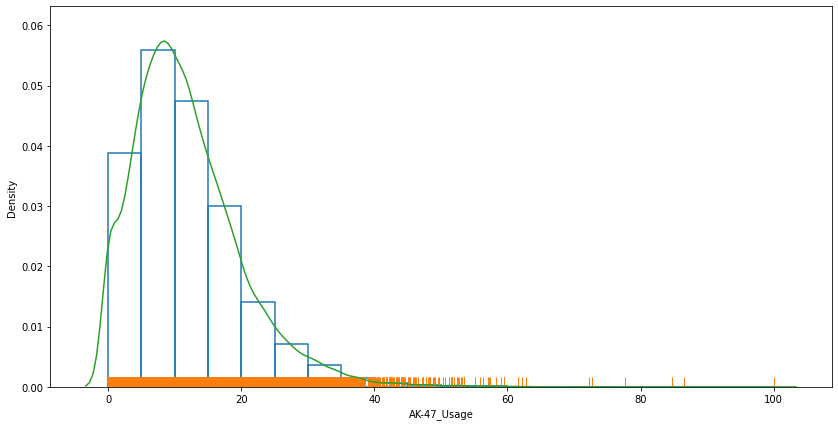

In [9]:
f, ax = plt.subplots(figsize=(14, 7))

sns.histplot(x='AK-47_Usage',
             stat="density",
             bins=20,
             fill=False,
             data=data);

sns.rugplot(x='AK-47_Usage',
            data=data);


sns.kdeplot(x='AK-47_Usage',
            data=data);



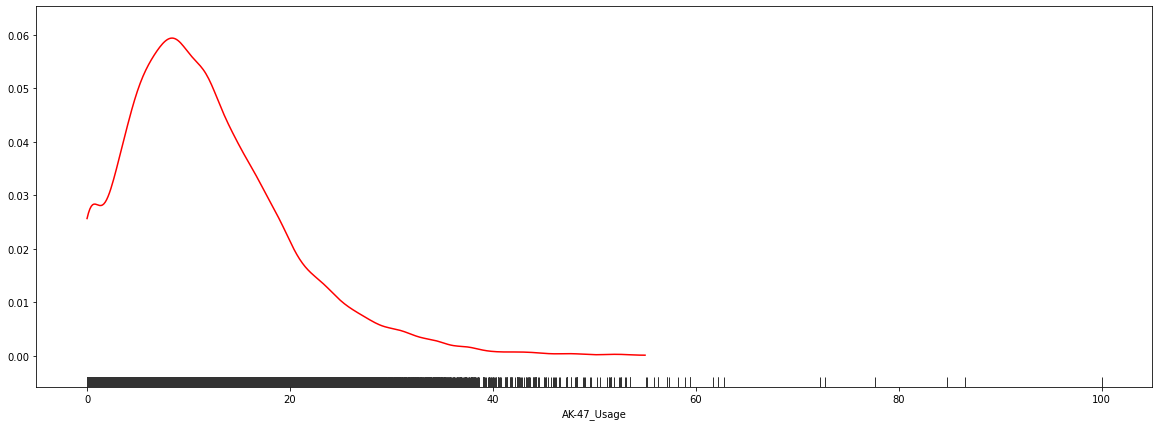

In [10]:
from scipy.integrate import trapz

f, ax = plt.subplots(figsize=(20, 7))

x = data['AK-47_Usage']

kernels = []

for x_i in x:
    x_axis = np.linspace(0, 55, 400)
    kernel = stats.norm(x_i, 1).pdf(x_axis)
    kernels.append(kernel)


S = np.sum(kernels, axis=0)

S /= trapz(S, x_axis)


plt.plot(x_axis, S, c='r');

sns.rugplot(x, color='.2', linewidth=1);

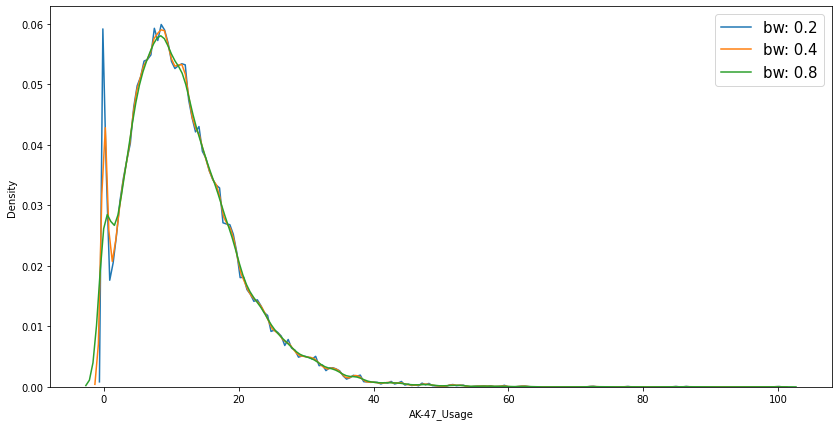

In [35]:
f, ax = plt.subplots(figsize=(14, 7))

sns.kdeplot(x='AK-47_Usage',
            bw_adjust=0.2,
            label='bw: 0.2',
            data=data);

sns.kdeplot(x='AK-47_Usage',
            bw_adjust=0.4,
            label='bw: 0.4',
            data=data);

sns.kdeplot(x='AK-47_Usage',
            bw_adjust=0.8,
            label='bw: 0.8',
            data=data);

plt.legend(fontsize = 15);

#2 ЗАДАНИЕ


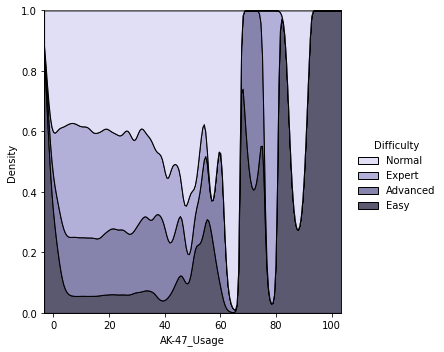

In [18]:
sns.displot(data = data, x = 'AK-47_Usage', 
	hue = 'Difficulty', 
	multiple="fill", kind="kde", palette="ch:rot=-0,light=.85")

Заметим, что подавляющее большинство тех, кто играют с АК-47 играют на сложности Easy.

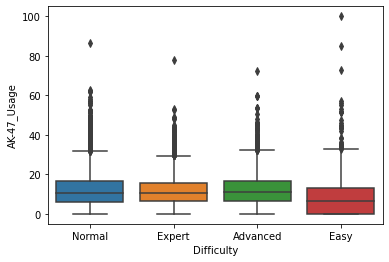

In [19]:
sns.boxplot(data = data, y = "AK-47_Usage", x = "Difficulty")

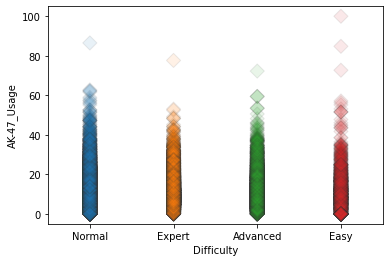

In [21]:
sns.stripplot(
    data=data, y = "AK-47_Usage", x = "Difficulty",
    jitter=False, s=10, marker="D", linewidth=1, alpha=.1,
)

#3 ЗАДАНИЕ

In [69]:
import numpy as np
from outliers import smirnov_grubbs as grubbs


d = data[:25][['AK-47_Usage']]

test = DixonTest(d, q=95, info=1, autorm=1)

grubbs.max_test_outliers(data[:25]['AK-47_Usage'].tolist(), alpha=0.05)

[40.04]

In [70]:
grubbs.max_test_outliers(data[:25]['AK-47_Usage'].tolist(), alpha=0.2)

[40.04]

#4 ЗАДАНИЕ

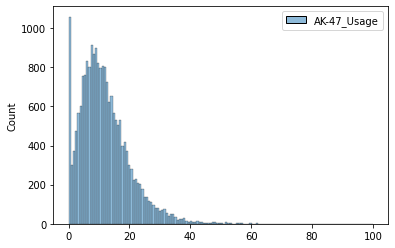

In [31]:
d = data[['AK-47_Usage']]
sns.histplot(d)

In [32]:
fill = np.random.choice(data.shape[0], int(data.shape[0] * 0.025))
normald = np.random.normal(size = 21000)
data['AK-47_Usage'][fill] = np.nan
data['AK-47_Usage'].isna().sum()

mean_fill = data['AK-47_Usage'].fillna(data['AK-47_Usage'].mean())
print(f'RMSE : {np.sqrt(np.mean((mean_fill[fill] - normald[fill]) ** 2))}')

RMSE : 11.86255742661308


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


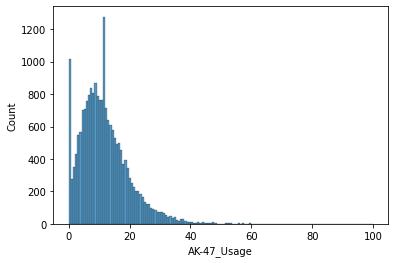

In [33]:
sns.histplot(mean_fill)

#5 и 6 ЗАДАНИЕ

Анализ с помощью графиков эмпирических функций распределений

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


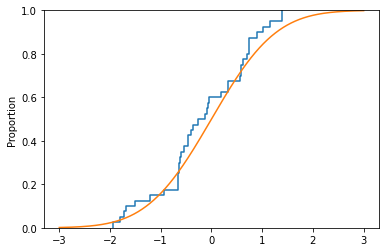

In [45]:
num = 40
mu = 0
sigma = 1

data1 = norm.rvs(size=num)

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
y = norm.cdf(x)

sns.ecdfplot(data1)
sns.lineplot(x,y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


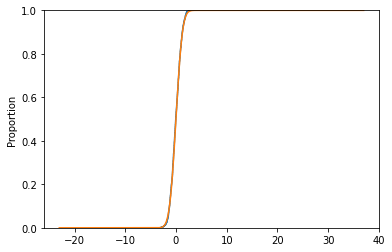

In [43]:
num = 1000
mu = 7
sigma = 10

data2 = norm.rvs(size=num)

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
y = norm.cdf(x)

sns.ecdfplot(data2)
sns.lineplot(x,y)

Анализ с помощью метода квантилей

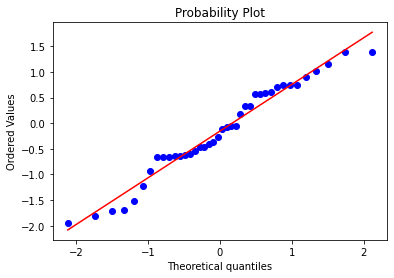

In [46]:
stats.probplot(data1, dist="norm", plot=plt)
plt.show()

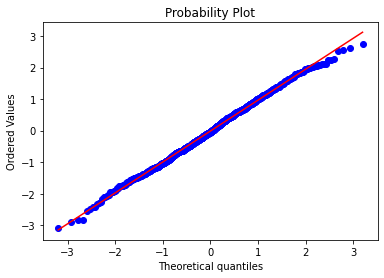

In [47]:
stats.probplot(data2, dist="norm", plot=plt)
plt.show()

Критерий Колмогорова-Смирнова

In [48]:
kstest(data1, stats.norm.cdf)

KstestResult(statistic=0.12046768562824794, pvalue=0.5660222747698276)

In [50]:
kstest(data2, stats.norm.cdf)

KstestResult(statistic=0.021147843021035118, pvalue=0.7540710018735217)

Критерий Шапиро-Уилка

In [51]:
shapiro(data1)

ShapiroResult(statistic=0.9617896676063538, pvalue=0.19275972247123718)

In [52]:
shapiro(data2)

ShapiroResult(statistic=0.997749924659729, pvalue=0.1930321455001831)

Критерий Андерсона-Дарлинга

In [53]:
anderson(data1)

AndersonResult(statistic=0.4866560191400282, critical_values=array([0.531, 0.605, 0.726, 0.847, 1.007]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [54]:
anderson(data2)

AndersonResult(statistic=0.5534972061138888, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Колмогорова-Смирнова вмодификации Лиллиефорса

In [55]:
lilliefors(data1)

(0.11590273829822162, 0.1981657199748808)

In [56]:
lilliefors(data2)

(0.02070244744598737, 0.45483471992617264)

# 7а ЗАДАНИЕ



In [66]:
# Student's t-test
 
from numpy.random import randn
from scipy.stats import ttest_ind

data1 = data['AK-47_Usage']
data2 = data[['Pistol_Usage']]

Гипотеза H0: Средние двух выборок равны, альтернативная гипотеза - не равны


In [70]:
stat, p = ttest_ind(data1, data2)
alpha = 0.05
if p > alpha:
  print('Принять H0')
else:
  print('Отклонить H0')

Отклонить H0


In [74]:
stat, p = ttest_ind(data1, data2)
alpha = 0.01
if p > alpha:
  print('Принять H0')
else:
  print('Отклонить H0')

Отклонить H0


In [75]:
stat, p = ttest_ind(data1, data2)
alpha = 0.1
if p > alpha:
  print('Принять H0')
else:
  print('Отклонить H0')

Отклонить H0


Гипотеза H0: Среднее первой выборки больше, альтернативная гипотеза - меньше


In [71]:
stat, p = ttest_ind(data1, data2, alternative = 'less')
alpha = 0.05
if p > alpha:
  print('Принять H0')
else:
  print('Отклонить H0')

Принять H0


In [76]:
stat, p = ttest_ind(data1, data2, alternative = 'less')
alpha = 0.01
if p > alpha:
  print('Принять H0')
else:
  print('Отклонить H0')

Принять H0


In [77]:
stat, p = ttest_ind(data1, data2, alternative = 'less')
alpha = 0.1
if p > alpha:
  print('Принять H0')
else:
  print('Отклонить H0')

Принять H0


Гипотеза H0: Среднее первой выборки меньше, альтернативная гипотеза - больше


In [72]:
stat, p = ttest_ind(data1, data2, alternative = 'greater')
alpha = 0.05
if p > alpha:
  print('Принять H0')
else:
  print('Отклонить H0')

Отклонить H0


In [78]:
stat, p = ttest_ind(data1, data2, alternative = 'greater')
alpha = 0.01
if p > alpha:
  print('Принять H0')
else:
  print('Отклонить H0')

Отклонить H0


In [79]:
stat, p = ttest_ind(data1, data2, alternative = 'greater')
alpha = 0.1
if p > alpha:
  print('Принять H0')
else:
  print('Отклонить H0')

Отклонить H0


Мощность

In [73]:
import statsmodels.stats.power as smp
print(smp.ttest_power(0.8, nobs=20, alpha=0.05, alternative='larger'))

0.9641727854966735


In [80]:
import statsmodels.stats.power as smp
print(smp.ttest_power(0.8, nobs=20, alpha=0.01, alternative='larger'))

0.8393107879472783


In [81]:
import statsmodels.stats.power as smp
print(smp.ttest_power(0.8, nobs=20, alpha=0.1, alternative='larger'))

0.9866597583113669


#7Б ЗАДАНИЕ

In [7]:
import scipy.stats as stats

data1 = np.random.normal(loc=5, size=500)
data2 = np.random.normal(loc=5, size=500)

stats. mannwhitneyu (data1, data2, alternative='two-sided')

MannwhitneyuResult(statistic=116811.0, pvalue=0.07295467643032154)

In [8]:
stats.wilcoxon(data1, data2)

WilcoxonResult(statistic=56082.0, pvalue=0.04294563880438129)

#7в ЗАДАНИЕ

In [25]:
def Phisher(sample_1, sample_2, alpha):
    var1 = np.var(sample_1, ddof=1)
    var2 = np.var(sample_2, ddof=1)
    f = var1/var2
    x = np.array(sample_1)
    y = np.array(sample_2)
    nun = x.size - 1
    dun = y.size - 1
    pval = 1-stats.f.cdf(f, nun, dun)
    
    print(' Тест Фишера:\n\tStatistics=%.3f, p=%.3f' % (f, pval))

    if pval > alpha:
        print('\tSame distribution (fail to reject H0)')
    else:
        print('\tDifferent distribution (reject H0)')
    print('\t\talpha = ', alpha)

def Levene(sample_1, sample_2, alpha):
    stat, p = stats.levene(sample_1, sample_2, center = 'mean')
    print('   Тест Левене:\n\tStatistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('\tSame distribution (fail to reject H0)')
    else:
        print('\tDifferent distribution (reject H0)')
    print('\t\talpha = ', alpha)

def Bartlet(sample_1, sample_2, alpha): 
    stat, p = stats.bartlett(sample_1, sample_2)
    print('   Тест Бартлета:\n\tStatistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('\tSame distribution (fail to reject H0)')
    else:
        print('\tDifferent distribution (reject H0)')
    print('\t\talpha = ', alpha)
    
def Fligner_Kilin(sample_1, sample_2, alpha):
    stat, p = stats.fligner(sample_1, sample_2, center = 'mean')
    print('   Тест Флигнера-Килина:\n\tStatistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('\tSame distribution (fail to reject H0)')
    else:
        print('\tDifferent distribution (reject H0)')

    print('\t\talpha = ', alpha)

In [39]:
data1 = np.random.normal(loc=4, size=500)
data2 = np.random.normal(loc=4, size=500)

In [40]:
Phisher(data1, data2, 0.05)
Phisher(data1, data2, 0.01)
Phisher(data1, data2, 0.1)

 Тест Фишера:
	Statistics=1.067, p=0.233
	Same distribution (fail to reject H0)
		alpha =  0.05
 Тест Фишера:
	Statistics=1.067, p=0.233
	Same distribution (fail to reject H0)
		alpha =  0.01
 Тест Фишера:
	Statistics=1.067, p=0.233
	Same distribution (fail to reject H0)
		alpha =  0.1


In [41]:
Levene(data1, data2, 0.05)
Levene(data1, data2, 0.01)
Levene(data1, data2, 0.1)

   Тест Левене:
	Statistics=0.178, p=0.674
	Same distribution (fail to reject H0)
		alpha =  0.05
   Тест Левене:
	Statistics=0.178, p=0.674
	Same distribution (fail to reject H0)
		alpha =  0.01
   Тест Левене:
	Statistics=0.178, p=0.674
	Same distribution (fail to reject H0)
		alpha =  0.1


In [42]:
Bartlet(data1, data2, 0.05)
Bartlet(data1, data2, 0.01)
Bartlet(data1, data2, 0.1)

   Тест Бартлета:
	Statistics=0.529, p=0.467
	Same distribution (fail to reject H0)
		alpha =  0.05
   Тест Бартлета:
	Statistics=0.529, p=0.467
	Same distribution (fail to reject H0)
		alpha =  0.01
   Тест Бартлета:
	Statistics=0.529, p=0.467
	Same distribution (fail to reject H0)
		alpha =  0.1


In [43]:
Fligner_Kilin(data1, data2, 0.05)
Fligner_Kilin(data1, data2, 0.01)
Fligner_Kilin(data1, data2, 0.1)

   Тест Флигнера-Килина:
	Statistics=0.155, p=0.694
	Same distribution (fail to reject H0)
		alpha =  0.05
   Тест Флигнера-Килина:
	Statistics=0.155, p=0.694
	Same distribution (fail to reject H0)
		alpha =  0.01
   Тест Флигнера-Килина:
	Statistics=0.155, p=0.694
	Same distribution (fail to reject H0)
		alpha =  0.1


#8 ЗАДАНИЕ

In [124]:
from scipy.stats import spearmanr
from scipy.stats import kendalltau

# коэффициент корреляции Пирсона
corr = np.corrcoef(data["AK-47_Shots"], data["AK-47_Kills"])
print(corr)

[[1.         0.93853673]
 [0.93853673 1.        ]]


Заметно, что коэф корреляции между количеством выстрелов и количеством убитых ботов равен 0.93853673

In [125]:
# коэффициент корреляции Спирмена
corr = spearmanr(data["AK-47_Shots"], data["AK-47_Kills"])
print(corr)

SpearmanrResult(correlation=0.9707269929687047, pvalue=0.0)


In [126]:
# коэффициент корреляции Кендалла
corr = kendalltau(data["AK-47_Shots"], data["AK-47_Kills"])
print(corr)

KendalltauResult(correlation=0.8581400641431791, pvalue=0.0)


#9 ЗАДАНИЕ

In [31]:
import pandas as pd
import numpy as np

In [45]:
contigency = pd.crosstab(data["AK-47_Shots"], data["AK-47_Kills"])
contigency

AK-47_Kills,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,348535.0,357533.0,364845.0,375292.0,532464.0,534973.0,614690.0,679498.0,699507.0,795689.0
AK-47_Shots,,,,,,,,,,,,,,,,,,,,,
0.0,840,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4.0,3,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960086.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1065472.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1135781.0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [46]:
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contigency)
p

0.0

In [38]:
#тест фишера

x = np.random.binomial(1, 0.4, size=600)
y = np.random.binomial(1, 0.8, size=600)
sps.fisher_exact(pd.crosstab(x, y)), sps.fisher_exact(pd.crosstab(x, 2 * x + 3))

((0.9086491739552964, 0.6755926648923829), (inf, 6.832813729163991e-174))

In [48]:
from statsmodels.stats.contingency_tables import mcnemar
x = np.random.binomial(1, 0.4, size=1000)
y = np.random.binomial(1, 0.4, size=1000)
print(mcnemar(pd.crosstab(x, y), exact=False))

pvalue      0.8558725986602864
statistic   0.032989690721649485


In [5]:
from cmh import CMH

d = pd.DataFrame()
d['str'] = np.random.binomial(1, 0.8, 1000)
d['x'] = np.random.binomial(1, 0.4, 1000)
d['y'] = np.random.binomial(1, 0.4, 1000)
CMH(d, 'x', 'y', 'str')

Cochran-Mantel-Haenszel Chi2 test

"x" x "y", stratified by "str"

Cochran-Mantel-Haenszel M^2 = 0.54484, dof = 1, p-value = 0.4604

#10 ЗАДАНИЕ

In [7]:
d = data[['AK-47_Shots', 'AK-47_Kills', 'AWP_Shots', 'AWP_Kills']]

In [8]:
corr = d.corr()
corr.style.background_gradient(cmap='coolwarm')

,AK-47_Shots,AK-47_Kills,AWP_Shots,AWP_Kills
AK-47_Shots,1.000000,0.938537,0.172106,0.213585
AK-47_Kills,0.938537,1.000000,0.159578,0.203351
AWP_Shots,0.172106,0.159578,1.000000,0.907071
AWP_Kills,0.213585,0.203351,0.907071,1.000000


In [6]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [11]:
data['AK47Shots'] = data['AK-47_Shots']
data['AK47Kills'] = data['AK-47_Kills']
data['AWPShots'] = data['AWP_Shots']
data['AWPKills'] = data['AWP_Kills']

Y, X = dmatrices('Difficulty~AK47Shots+AK47Kills+AWPShots+AWPKills', data=data, return_type='dataframe')
ans = pd.DataFrame()
ans['variable'] = X.columns
ans['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(ans)

    variable       VIF
0  Intercept  1.126062
1  AK47Shots  8.432036
2  AK47Kills  8.401886
3   AWPShots  5.663968
4   AWPKills  5.759146


Вывод: Все переменные с VIF > 5 сильно зависят от остальных переменных.

#11 ЗАДАНИЕ


In [18]:
a = data[data['AK-47_Shots'] == 500]['AK-47_Kills']
b = data[data['AK-47_Shots'] == 600]['AK-47_Kills'][:len(a)]

stats.f_oneway(a, b)

F_onewayResult(statistic=1.842274808894461, pvalue=0.3075586489103534)

Видим, что в среднем игроки внезависимости от числа выстрелов из АК-47 делают одинаковое число фрагов.

#12 ЗАДАНИЕ

In [41]:
x = np.array(data['AK-47_Shots'])
y = np.array(data['AK-47_Kills'])

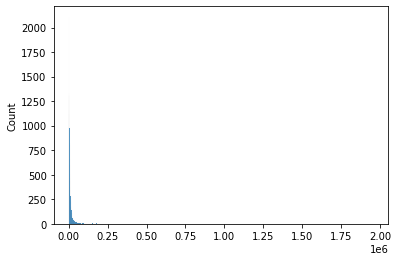

In [50]:
sns.histplot(x)

0.8808511958612744


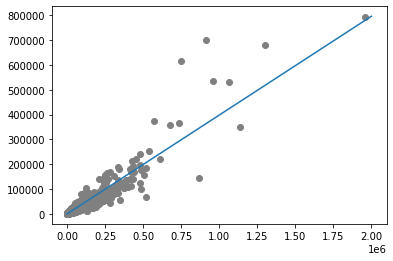

In [71]:
model = LinearRegression()
X = np.array([x]).T
model.fit(X, y)

x_new = np.array([np.linspace(0, 2e6, 1000)]).T
y_new = model.predict(x_new)
plt.scatter(X, y, color='gray')
plt.plot(x_new, y_new)
print(model.score(X, y))

In [64]:
np.linspace(0, 100, 1001)

array([  0. ,   0.1,   0.2, ...,  99.8,  99.9, 100. ])

0.8887727091283346


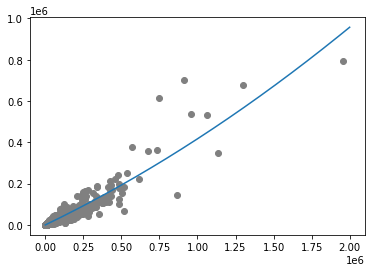

In [68]:
quad = PolynomialFeatures(degree=2)
X_quad = quad.fit_transform(X)
x_new = np.array([np.linspace(0, 2e6, 1000)]).T

model.fit(X_quad, y)
ans = model.predict(quad.fit_transform(x_new))
plt.scatter(X, y, color='gray')
plt.plot(x_new, ans, label='quadratic regression')
print(model.score(X_quad, y))

0.9012603060904956


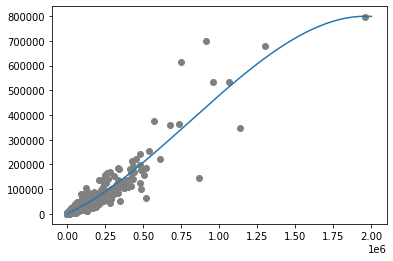

In [69]:
quad = PolynomialFeatures(degree=3)
X_quad = quad.fit_transform(X)
x_new = np.array([np.linspace(0, 2e6, 1000)]).T

model.fit(X_quad, y)
ans = model.predict(quad.fit_transform(x_new))
plt.scatter(X, y, color='gray')
plt.plot(x_new, ans, label='quadratic regression')
print(model.score(X_quad, y))

**Видно, что зависимость у данных линейная, так как даже нелинейные регрессии дали предсказание очень близкое к предсказанию линейной.**
Учитывая то, какую задачу мы рассматриваем, вполне логичным является факт, что число фрагов(kills) линейно зависит от числа выстрелов.